# Global Data Loading Test

测试全球数据统一接口

测试内容：
1. 加载全球 abandonment 数据 (.nc + .csv)
2. 加载全球 feature 数据
3. 加载 PV embedding 数据
4. 加载全球矢量边界
5. 验证数据对齐

In [2]:

import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / "src"))

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import yaml
%load_ext autoreload
%autoreload 2
print("✅ Import successful")

✅ Import successful


## 1. Load Configuration

In [3]:
from landuse.data import GlobalDataPaths, get_global_paths

# Load config
config_path = Path.cwd().parent / "configs" / "global.yaml"
with open(config_path, 'r', encoding='utf-8') as f:
    config = yaml.safe_load(f)

# Initialize paths
paths = GlobalDataPaths(config, workspace_root=Path.cwd().parent)

print("📂 Global Data Paths Initialized")
print(f"   Workspace: {paths.workspace_root}")
print(f"   Total paths: {len(paths.list_all_paths())}")

📂 Global Data Paths Initialized
   Workspace: c:\Dev\Landuse_Global_Pipeline_Worktree
   Total paths: 27


## 2. Inspect All Configured Paths

In [4]:
# Display all paths
all_paths = paths.list_all_paths()

print("\n📋 All Configured Paths:\n")
for key, value in all_paths.items():
    if isinstance(value, dict):
        print(f"  {key}:")
        for k, v in value.items():
            print(f"    - {k}: {v}")
    else:
        print(f"  {key}: {value}")


📋 All Configured Paths:

  abandonment_nc: D:/xarray/merged_chunk_2/*.nc
  abandonment_csv: D:/xarray/03_test/Global_total_2020.csv
  feature: D:/xarray/aligned2/Feature_all/*.nc
  emission: D:/xarray/aligned2/Emission_all/*.nc
  pv_sites_csv: C:/Dev/Landuse_Zhong_clean/data/aligned_for_training0519.csv
  pv_embedding: data/pv_global_embedding.csv
  world_shp: world_shp/ne_10m_land.shp
  cn_sheng: data/sheng2022.shp
  us_county: data/cb_2018_us_county_5m.shp
  test_output: positive_samples_test_500.csv
  full_output: positive_samples_full_with_features.csv
  carbon_benefit: data/4.data_prediction_net_benefit.csv
  restoration_strategies: data/4.1 Restoration_strategy_data.csv
  weighted_density: data/4.df_strategies.csv
  pv_npv_base: data/5.1_photovoltaic_results_demand_scenario_5.csv
  pv_npv_scenarios:
    - electrification: data/5.1_photovoltaic_results_demand_scenario_0.csv
    - high_growth: data/5.1_photovoltaic_results_demand_scenario_1.csv
    - low_growth: data/5.1_photovolt

## 3. Test: Load Abandonment Data (NetCDF)

In [ ]:
from landuse.data import load_all_ds

print("🔄 Loading abandonment + feature datasets...")
print(f"   Abandonment: {paths.get('abandonment_nc')}")
print(f"   Features: {paths.get('feature')}")

# Load merged dataset
try:
    ds = load_all_ds(paths, chunks={'lat': 500, 'lon': 500, 'time': 1})
    
    print("\n✅ Dataset loaded successfully!")
    print(f"\n📊 Dataset Info:")
    print(f"   Dimensions: {dict(ds.dims)}")
    print(f"   Variables: {list(ds.data_vars)}")
    print(f"   Coordinates: {list(ds.coords)}")
    print(f"   Spatial extent: Lon [{float(ds.lon.min()):.2f}, {float(ds.lon.max()):.2f}], Lat [{float(ds.lat.min()):.2f}, {float(ds.lat.max()):.2f}]")
    
except Exception as e:
    print(f"\n❌ Error loading dataset: {e}")
    ds = None

🔄 Loading abandonment + feature datasets...
   Abandonment: D:/xarray/merged_chunk_2/*.nc
   Features: D:/xarray/aligned2/Feature_all/*.nc


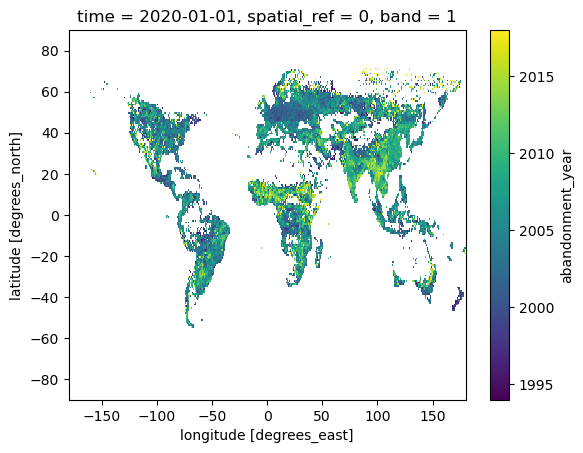

In [ ]:
# # Use a datetime-indexed value, e.g. "2020-01-01" if time is datetime64
# ds['abandonment_year'].sel(time='2020-01-01').coarsen(lat=100, lon=100, boundary="trim").mean().plot()

## 4. Test: Load Abandonment CSV

In [ ]:
from landuse.data import load_abandonment_csv

print("🔄 Loading abandonment CSV...")
print(f"   Path: {paths.get('abandonment_csv')}")

try:
    df_abandon = load_abandonment_csv(paths)
    
    print("\n✅ Abandonment CSV loaded successfully!")
    print(f"\n📊 DataFrame Info:")
    print(f"   Shape: {df_abandon.shape}")
    print(f"   Columns: {df_abandon.columns.tolist()}")
    print(f"\n🔍 First 5 rows:")
    display(df_abandon.head())
    
except Exception as e:
    print(f"\n❌ Error loading CSV: {e}")
    df_abandon = None

🔄 Loading abandonment CSV...
   Path: D:/xarray/03_test/Global_total_2020.csv

✅ Abandonment CSV loaded successfully!

📊 DataFrame Info:
   Shape: (1984684, 25)
   Columns: ['lat', 'lon', 'time', 'spatial_ref', 'band', 'abandonment_year', 'abandonment_duration', 'recultivation', 'current_abandonment', 'landcover', 'DEM', 'gdmp', 'GDPpc', 'GDPtot', 'GURdist', 'landcover_at_abandonment', 'Population', 'Powerdist', 'PrimaryRoad', 'rsds', 'SecondaryRoad', 'Slope', 'tas', 'TertiaryRoad', 'wind']

🔍 First 5 rows:


,lat,lon,time,spatial_ref,band,abandonment_year,abandonment_duration,recultivation,current_abandonment,landcover,...,landcover_at_abandonment,Population,Powerdist,PrimaryRoad,rsds,SecondaryRoad,Slope,tas,TertiaryRoad,wind
0,-54.437500,-68.045830,2020-01-01,0,1,2001.0,22.0,NaN,1.0,2.0,...,NaN,7.873947,161757.360,0.000000,11.832184,0.0,6.488658,2778.309013,0.000000,3.182466
1,-54.304165,-68.104164,2020-01-01,0,1,2007.0,16.0,NaN,1.0,3.0,...,NaN,7.873946,150678.280,0.000000,11.743828,0.0,2.247000,2784.936130,0.000000,4.401053
2,-54.295834,-68.679169,2020-01-01,0,1,2016.0,7.0,NaN,1.0,2.0,...,NaN,0.176619,129902.414,0.000000,11.865016,0.0,11.017923,2766.397778,0.000000,5.132944
3,-54.279167,-68.120834,2020-01-01,0,1,2007.0,16.0,NaN,1.0,2.0,...,NaN,7.873947,148838.300,0.000000,11.579480,0.0,2.199511,2785.215135,0.000000,5.023683
4,-54.195835,-67.129166,2020-01-01,0,1,2002.0,21.0,NaN,1.0,3.0,...,NaN,7.873948,187456.250,0.508324,12.040218,0.0,1.530227,2796.806778,11.869622,3.646661


## 5. Test: Load PV Sites

In [10]:
from landuse.data import load_pv_sites

print("🔄 Loading PV sites...")
print(f"   Path: {paths.get('pv_sites_csv')}")

try:
    df_pv = load_pv_sites(paths.get('pv_sites_csv'), years=[2018, 2020])
    
    print("\n✅ PV sites loaded successfully!")
    print(f"\n📊 DataFrame Info:")
    print(f"   Shape: {df_pv.shape}")
    print(f"   Columns: {df_pv.columns.tolist()}")
    print(f"   Spatial extent: Lon [{df_pv.lon.min():.2f}, {df_pv.lon.max():.2f}], Lat [{df_pv.lat.min():.2f}, {df_pv.lat.max():.2f}]")
    print(f"\n🔍 First 5 rows:")
    display(df_pv.head())
    
except Exception as e:
    print(f"\n❌ Error loading PV sites: {e}")
    df_pv = None

🔄 Loading PV sites...
   Path: C:/Dev/Landuse_Zhong_clean/data/aligned_for_training0519.csv

✅ PV sites loaded successfully!

📊 DataFrame Info:
   Shape: (103927, 7)
   Columns: ['unique_id', 'p_area', 'capacity_m', 'country', 'time', 'lon', 'lat']
   Spatial extent: Lon [-177.93, 177.16], Lat [-53.20, 69.75]

🔍 First 5 rows:


,unique_id,p_area,capacity_m,country,time,lon,lat
0,1,13592.361840,1.201704,GRC,2018-01-01,21.612499,38.112499
1,2,3411.622302,0.309810,DEU,2018-01-01,6.379167,50.195835
2,3,20889.852880,1.752301,GBR,2018-01-01,-0.895833,52.037498
3,4,4154.511624,0.397576,GRC,2018-01-01,21.654167,38.112499
4,5,4794.474966,0.440007,CZE,2018-01-01,14.279166,50.520832


In [11]:
import pandas as pd 

pv_2018=r'D:\xarray\aligned2\pv\PV_2018_for_aligning.csv'
pv_2020=r'D:\xarray\aligned2\pv\PV_2020_for_aligning.csv'

pv_2018=pd.read_csv(pv_2018,index_col=0)
pv_2020=pd.read_csv(pv_2020,index_col=0)


In [12]:
pv_2018['p_area'].min()

369.68704

In [13]:
pv_2020['p_area'].min()

0.612164697

## 6. Test: Load World Boundaries

In [14]:
from landuse.data import load_world_boundaries

print("🔄 Loading world boundaries...")
print(f"   Path: {paths.get('world_shp')}")

try:
    gdf_world = load_world_boundaries(paths)
    
    print("\n✅ World boundaries loaded successfully!")
    print(f"\n📊 GeoDataFrame Info:")
    print(f"   Shape: {gdf_world.shape}")
    print(f"   CRS: {gdf_world.crs}")
    print(f"   Bounds: {gdf_world.total_bounds}")
    print(f"\n🔍 First 3 features:")
    display(gdf_world.head(3))
    
except Exception as e:
    print(f"\n❌ Error loading world boundaries: {e}")
    gdf_world = None

🔄 Loading world boundaries...
   Path: world_shp/ne_10m_land.shp

❌ Error loading world boundaries: world_shp/ne_10m_land.shp: No such file or directory


## 7. Validate Data Alignment

In [ ]:
from landuse.data import validate_data_alignment

if ds is not None and df_pv is not None:
    print("🔄 Validating data alignment...")
    
    is_aligned = validate_data_alignment(df_pv, ds)
    
    if is_aligned:
        print("\n✅ Data is spatially aligned!")
    else:
        print("\n⚠️ Data alignment issues detected (see warnings above)")
else:
    print("\n⚠️ Cannot validate alignment - dataset or PV data not loaded")

🔄 Validating data alignment...

✅ Data is spatially aligned!


## 8. Plot: Spatial Distribution

In [ ]:
if df_pv is not None and gdf_world is not None:
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Plot world boundaries
    gdf_world.boundary.plot(ax=ax, color='gray', linewidth=0.5, alpha=0.5)
    
    # Plot PV sites
    ax.scatter(df_pv.lon, df_pv.lat, s=1, c='red', alpha=0.3, label='PV Sites')
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Global PV Sites Distribution', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 Plotted {len(df_pv)} PV sites")
else:
    print("\n⚠️ Cannot plot - data not loaded")


⚠️ Cannot plot - data not loaded


## 9. Feature Variables Inspection

In [ ]:
from landuse.data import (
    get_all_feature_variables,
    get_all_abandonment_variables,
    get_numeric_features,
    get_categorical_features
)

print("📋 Variable Definitions:\n")

print("Feature Variables:")
for var in get_all_feature_variables():
    print(f"  - {var}")

print("\nAbandonment Variables:")
for var in get_all_abandonment_variables():
    print(f"  - {var}")

print("\nNumeric Features (for ML):")
for var in get_numeric_features():
    print(f"  - {var}")

print("\nCategorical Features:")
for var in get_categorical_features():
    print(f"  - {var}")

📋 Variable Definitions:

Feature Variables:
  - DEM
  - Powerdist
  - PrimaryRoad
  - SecondaryRoad
  - TertiaryRoad
  - Slope
  - GDPpc
  - GDPtot
  - GURdist
  - Population
  - gdmp
  - rsds
  - tas
  - wind

Abandonment Variables:
  - current_abandonment
  - recultivation
  - abandonment_duration
  - abandonment_year

Numeric Features (for ML):
  - lat
  - lon
  - GDPpc
  - GDPtot
  - GURdist
  - DEM
  - Slope
  - Population
  - Powerdist
  - PrimaryRoad
  - SecondaryRoad
  - TertiaryRoad
  - gdmp
  - rsds
  - tas
  - wind

Categorical Features:
  - landcover


## 10. Test Summary

In [ ]:
print("\n" + "="*60)
print("📊 TEST SUMMARY")
print("="*60)

tests = [
    ("Configuration", config is not None),
    ("Global Paths", paths is not None),
    ("Abandonment Dataset", ds is not None),
    ("Abandonment CSV", df_abandon is not None),
    ("PV Sites", df_pv is not None),
    ("World Boundaries", gdf_world is not None),
]

for test_name, result in tests:
    status = "✅ PASS" if result else "❌ FAIL"
    print(f"  {test_name:.<40} {status}")

passed = sum(1 for _, r in tests if r)
total = len(tests)

print("\n" + "="*60)
print(f"Results: {passed}/{total} tests passed ({passed/total*100:.1f}%)")
print("="*60)


📊 TEST SUMMARY
  Configuration........................... ✅ PASS
  Global Paths............................ ✅ PASS
  Abandonment Dataset..................... ✅ PASS
  Abandonment CSV......................... ✅ PASS
  PV Sites................................ ✅ PASS
  World Boundaries........................ ❌ FAIL

Results: 5/6 tests passed (83.3%)
